📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크 📝

[https://guebin.github.io/DL2025/posts/11wk-2.html](https://guebin.github.io/DL2025/posts/11wk-2.html)

# 2. Imports 📝

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

# 3. 예비학습 📝

🗣️(

```
추천시스템
--(1) MF-based: SVD(행렬분해)  overfit, underfit에서 조금 자유로움 (표현력이 거의 무한대)
--(2) NN-based:               overfit, underfit 조정 필요
```

)🗣️

## A. `tanh`

🗣️(

- 활성화 함수
    - 출력이 -1 ~ 1 => 반대 느낌을 해석 가능 (-1, 1)
    - (Sigmoid: 0 ~ 1) => 확률로 해석 가능 

)🗣️

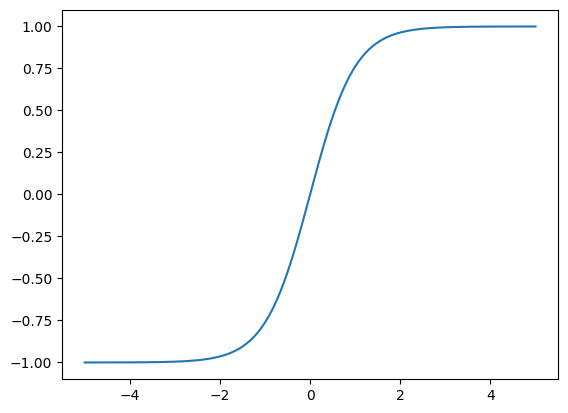

In [84]:
x = torch.linspace(-5,5,1001)
tanh = torch.nn.Tanh()
plt.plot(x,tanh(x).data)

## B. `softmax`

🗣️(

- 활성화 함수
    - logit을 가지고 실질적인 prob로 바꾸는 함수
    - 참고 
        - y가 2개의 클래스가 아니라 여러 개의 클래스를 갖고 있을 때
        - binary cross entropy를 쓰지 않고 cross entropy를 사용

In [3]:
logits = torch.randn((10,5))
logits

tensor([[-1.2261,  0.4259, -0.1552,  0.1053, -0.7315],
        [ 0.1195, -1.2003,  0.0711, -0.4024,  0.0612],
        [ 1.6710, -0.1026,  0.0664, -1.9638, -1.5250],
        [-0.1543, -0.4821, -0.2287, -0.4783, -1.5374],
        [ 0.0277, -1.7424,  1.6880, -1.5535, -0.9432],
        [-1.4717,  1.1867,  0.6488,  1.0316,  0.1506],
        [-0.6202, -1.4209, -0.3404,  0.7866, -0.4144],
        [-0.7437, -1.8049, -1.8204,  0.1902, -1.0927],
        [-0.6898, -0.6155, -1.4422, -1.6997,  2.8129],
        [ 0.5973, -2.2392, -0.3642,  1.2237,  1.0233]])

In [4]:
probs = torch.nn.functional.softmax(logits,dim=1)
probs # 확률값이 나옴

tensor([[0.0687, 0.3583, 0.2004, 0.2600, 0.1126],
        [0.2662, 0.0711, 0.2536, 0.1580, 0.2511],
        [0.6954, 0.1180, 0.1398, 0.0184, 0.0285],
        [0.2760, 0.1989, 0.2562, 0.1996, 0.0692],
        [0.1425, 0.0243, 0.7499, 0.0293, 0.0540],
        [0.0245, 0.3490, 0.2038, 0.2989, 0.1238],
        [0.1237, 0.0556, 0.1637, 0.5051, 0.1520],
        [0.2026, 0.0701, 0.0690, 0.5154, 0.1429],
        [0.0277, 0.0298, 0.0130, 0.0101, 0.9194],
        [0.2065, 0.0121, 0.0789, 0.3863, 0.3162]])

- 가로로 더하면 1

In [6]:
probs = torch.nn.functional.softmax(logits,dim=0)
probs # 세로로 더하면 1 (참고)

tensor([[0.0241, 0.1949, 0.0663, 0.0886, 0.0201],
        [0.0925, 0.0383, 0.0831, 0.0533, 0.0444],
        [0.4364, 0.1149, 0.0827, 0.0112, 0.0091],
        [0.0703, 0.0786, 0.0616, 0.0494, 0.0090],
        [0.0844, 0.0223, 0.4186, 0.0169, 0.0162],
        [0.0188, 0.4170, 0.1481, 0.2236, 0.0485],
        [0.0441, 0.0307, 0.0551, 0.1750, 0.0276],
        [0.0390, 0.0209, 0.0125, 0.0964, 0.0140],
        [0.0412, 0.0688, 0.0183, 0.0146, 0.6951],
        [0.1491, 0.0136, 0.0538, 0.2710, 0.1161]])

)🗣️

In [86]:
logits = torch.randn((10,5))
logits

tensor([[ 0.6408, -0.2422,  1.3521,  1.1399, -0.3036],
        [-0.5242, -0.3710, -0.3861, -0.5475,  3.1393],
        [ 0.5174, -1.3213,  3.1802, -0.6713,  0.5917],
        [ 0.0931,  1.0697,  0.6469, -1.1904, -0.1057],
        [-1.3722,  0.4665, -0.7705, -0.6630, -1.1054],
        [ 1.2289,  1.4994, -0.9319,  0.8154, -0.2033],
        [-0.3431,  0.3966, -0.9672, -1.6696,  0.7154],
        [ 0.4969, -0.6918,  1.1579, -2.4760,  0.1766],
        [ 0.8880, -0.0768,  1.5095, -0.2842,  0.4944],
        [ 0.2732, -2.0850, -0.5531,  0.1073, -0.1218]])

In [89]:
probs = torch.nn.functional.softmax(logits,dim=1)
probs

tensor([[0.1823, 0.0754, 0.3712, 0.3002, 0.0709],
        [0.0231, 0.0269, 0.0265, 0.0226, 0.9009],
        [0.0593, 0.0094, 0.8494, 0.0181, 0.0638],
        [0.1540, 0.4090, 0.2680, 0.0427, 0.1263],
        [0.0803, 0.5050, 0.1466, 0.1632, 0.1049],
        [0.3007, 0.3941, 0.0346, 0.1988, 0.0718],
        [0.1475, 0.3091, 0.0790, 0.0392, 0.4252],
        [0.2489, 0.0758, 0.4820, 0.0127, 0.1807],
        [0.2366, 0.0901, 0.4404, 0.0733, 0.1596],
        [0.3275, 0.0310, 0.1434, 0.2775, 0.2206]])

# 4. `abc` 📝

🗣️(

```
a b c a b c a b c a ???
단어1 단어2 단어3 ... ....... ???
이런 것을 맞추고 싶음

회귀분석: X, y가 아주 명확
이미지자료분석: X가 복잡해도 X로 y를 clear하게 맞출 수 있음
추천시스템: 회귀분석과 비슷한 setting으로 바꿀 수 있음
abcabc: 억지로 X, y로 만들 수 있음
a 입력 b 출력, b 입력 c 출력 ...
"b" <--- net("a")
"c" <--- net("b")

다음과 같이 데이터 정리 가능
X y
a b
b c
c a
a b
...
...
항상 X가 먼저 나오므로 X를 이전 시점, y를 다음 시점으로 볼 수도 있음

참고)
통계학: AR 모형
텍스트 마이닝``
a b c a b c a b c a ???
단어1 단어2 단어3 ... ....... ???
이런 것을 맞추고 싶음

회귀분석: X, y가 아주 명확
이미지자료분석: X가 복잡해도 X로 y를 clear하게 맞출 수 있음
추천시스템: 회귀분석과 비슷한 setting으로 바꿀 수 있음
abcabc: 억지로 X, y로 만들 수 있음
a 입력 b 출력, b 입력 c 출력 ...
"b" <--- net("a")
"c" <--- net("b")

다음과 같이 데이터 정리 가능
X y
a b
b c
c a
a b
...
...
항상 X가 먼저 나오므로 X를 이전 시점, y를 다음 시점으로 볼 수도 있음

기존 데이터를 쪼개서 과거의 내가 미래의 나를 맞추게 함

참고)
통계학: AR 모형
텍스트 마이닝: N-gram
```

)🗣️

## A. Data

In [7]:
txt = list('abc'*100)
txt[:10]

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a']

In [8]:
df_train = pd.DataFrame({'x': txt[:-1], 'y': txt[1:]})
df_train[:5]

,x,y
0,a,b
1,b,c
2,c,a
3,a,b
4,b,c


In [9]:
x = torch.tensor(df_train.x.map({'a':0,'b':1,'c':2}))
y = torch.tensor(df_train.y.map({'a':0,'b':1,'c':2}))

In [101]:
# x,y 
# --- 원래는 이 형식이 틀림
# 그런데 y는 onehot 안해도 알아서 토치에서 해주므로 length-n 벡터형태로 정리해도 무방
# 그리고 x는 onehot+linr를 쓰지않고 임베딩을 쓰려고 마음먹었으면 length-n 벡터형태로 정리해도 무방

🗣️(

In [10]:
x

tensor([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1]

In [11]:
y

tensor([1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]

)🗣️

## B. MLP -- 하나의 은닉노드

🗣️(

```
X --- hidden layer ---> y
nx3 --  nx1  -- nx3

1인 이유: hidden node의 수를 가능한 작게 만들고 싶음
첫번째(3->1) linear transform (embedding)
두번째(1->3) linear transform을 연속으로 하면 표현력에 문제가 생기므로
중간에 비선형 변환 (보통은 ReLU를 쓰나 여기서는 Tanh)

```

In [12]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3, embedding_dim=1), # one hot + linear
    torch.nn.Tanh(), # 출력이 -1~1이면 문자 등을 표현할 때 좋다고 하고 일단 넘어감
    torch.nn.Linear(1,3)
)
loss_fn = torch.nn.CrossEntropyLoss() # logit을 받는다는 의미 (net 마지막에 softmax 없어도 됨)
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)

# 복잡하게 하려면 network 모드도 바꾸고 batch도 만들 수 있으나 데이터가 단순하여 간단하게 해도 잘 맞음
#---#
for epoc in range(50):
    #1 
    netout = net(x) # logit
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

In [14]:
# netout # logit 값

In [15]:
# netout.argmax(axis=1) # y에 대한 예측을 보려면

In [16]:
netout.argmax(axis=1)[:5], y[:5] # 실제 y와 비교

(tensor([1, 2, 0, 1, 2]), tensor([1, 2, 0, 1, 2]))

- 다 맞추는데 진짜 학습이 잘 되었을까? 

)🗣️

`-` 적합 

In [140]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3, embedding_dim=1),
    torch.nn.Tanh(), 
    torch.nn.Linear(1,3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

In [141]:
netout.argmax(axis=1)[:5], y[:5]

(tensor([1, 2, 0, 1, 2]), tensor([1, 2, 0, 1, 2]))

`-` 결과시각화 

🗣️(

In [18]:
net # Embedding도 쪼개려면 one hot + linear로 할 수 있지만 하나로 치면

Sequential(
  (0): Embedding(3, 1)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=3, bias=True)
)

In [19]:
ebdd = net[0]
tanh = net[1]
linr = net[2]
# ebdd,tanh,linr = net 동일

In [20]:
linr(tanh(ebdd(x))).data[:5]

tensor([[-5.4318,  2.8601,  0.9936],
        [-0.7939, -0.4841,  1.2590],
        [ 3.9698, -3.9191,  1.5316],
        [-5.4318,  2.8601,  0.9936],
        [-0.7939, -0.4841,  1.2590]])

In [22]:
net(x).data[:5] # 위와 동일

tensor([[-5.4318,  2.8601,  0.9936],
        [-0.7939, -0.4841,  1.2590],
        [ 3.9698, -3.9191,  1.5316],
        [-5.4318,  2.8601,  0.9936],
        [-0.7939, -0.4841,  1.2590]])

In [23]:
# ebdd(x) # n x 1

In [24]:
# tanh(ebdd(x)) # 출력이 -1 ~ 1로 눌림

In [25]:
h = tanh(ebdd(x)) # hidden

In [28]:
# torch.nn.functional.one_hot(x) # n x 3, 사실은 이게 x

In [29]:
X = torch.nn.functional.one_hot(x) # X라고 하면
h = tanh(ebdd(x)) # tanh(linr(X))와 동일

In [31]:
X.shape, h.shape # 이 둘을 합치면

(torch.Size([299, 3]), torch.Size([299, 1]))

In [32]:
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x))
mat = torch.concat([X,h], axis=1).data

In [33]:
mat.shape

torch.Size([299, 4])

In [35]:
mat[:8,:].shape # mat[:8]과 동일

torch.Size([8, 4])

In [37]:
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x))
mat = torch.concat([X,h], axis=1).data
mat[:8] # column0~2: 입력 / column3: 결과

tensor([[ 1.0000,  0.0000,  0.0000, -0.9840],
        [ 0.0000,  1.0000,  0.0000, -0.0065],
        [ 0.0000,  0.0000,  1.0000,  0.9976],
        [ 1.0000,  0.0000,  0.0000, -0.9840],
        [ 0.0000,  1.0000,  0.0000, -0.0065],
        [ 0.0000,  0.0000,  1.0000,  0.9976],
        [ 1.0000,  0.0000,  0.0000, -0.9840],
        [ 0.0000,  1.0000,  0.0000, -0.0065]])

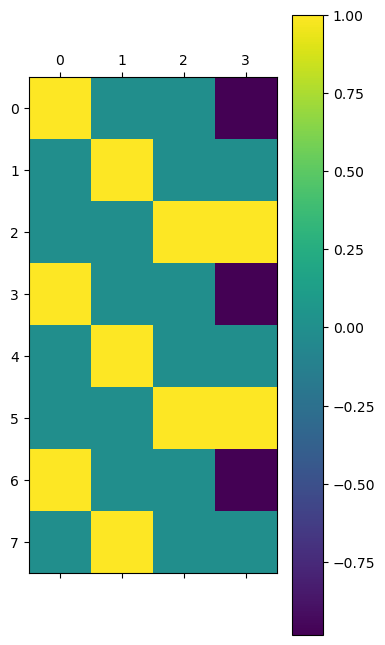

In [40]:
plt.matshow(mat[:8])
plt.colorbar()

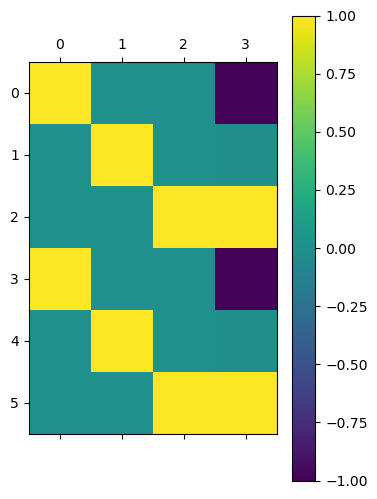

In [39]:
plt.matshow(mat[:6], vmin=-1, vmax=1)
plt.colorbar()

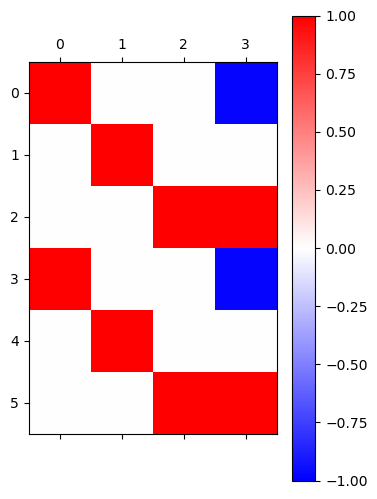

In [41]:
plt.matshow(mat[:6], vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()

- 해석
    - X(col0~2)는 one hot encoding 되어 있음 (-1 불가)
    - h는 -1, 0, 1로 나옴

- h가 yhat으로 나가는 과정

In [42]:
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x))
netout = linr(h) # net(x)와 동일

In [43]:
# netout # logit , n x 3

In [44]:
netout.max()

tensor(3.9698, grad_fn=<MaxBackward1>)

- 시각화를 위해 max로 나누면 (누르는 효과)

In [47]:
# netout/netout.max()

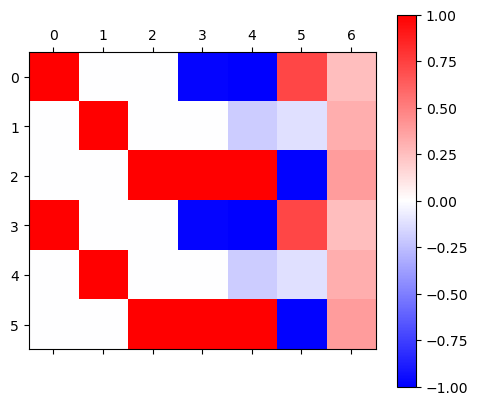

In [48]:
mat = torch.concat([X,h, netout/netout.max()], axis=1).data
plt.matshow(mat[:6], vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()

- 해석
    - col 0~2: X
    - col 3: h
    - col 4~6: netout = logits
        - 빨간 값이 제일 큼 (최댓값으로 나눴기 때문에)
        - 첫번째 경우(a): 0 1 0 => b
        - 두번째 경우(b): c
        - 세번째 경우(c): a
    - weight가 잘 맞춰져서 y가 그럴듯하게 나오고 있음

- yhat을 구하려면

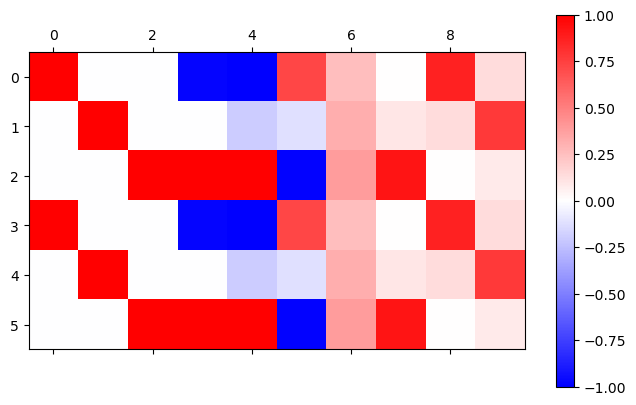

In [50]:
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x))
netout = logits = linr(h)
yhat = torch.nn.functional.softmax(netout,dim=1)
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1).data
plt.matshow(mat[:6], vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()

- 해석
    - col 0~2: X
    - col 3: h
    - col 4~6: netout = logits
    - col 7~9: 확률값 (파란색 불가)
        - 7: a라고 예측할 확률
        - 8: b라고 예측할 확률
        - 9: c라고 예측할 확률
    - 예측이 잘 되어 있는 것 같은데 확률값이 어떻게 나와있나보면
        - 빨간색을 제외한 부분이 0이 아닌 경우도 있어 여지가 생김
    - logits을 살펴보면
        - 4: a 구분 (나쁘지 않음)
        - 파란색 (a 아님) 흰색 (모름) 빨간색 (a 맞음)
        - 5: b 구분 (나쁘지 않음)
        - 6: c 구분 (파란색이 없어서 구분이 애매함)
    - 4,5,6을 같이보면
        - c의 경우는 애매한 결과만 나옴
        - row1의 경우 4,5가 ?이기 때문에 결과적으로 c가 나옴
        - row2의 경우 b는 절대 아님, a가 c보다 강함
    - c는 객관식을 맞추는 느낌
    - a,b는 정확하게 판단

In [54]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3, embedding_dim=1),
    torch.nn.Tanh(), 
    torch.nn.Linear(1,3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

In [55]:
ebdd,tanh,linr = net

/tmp/ipykernel_2844881/1114894007.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


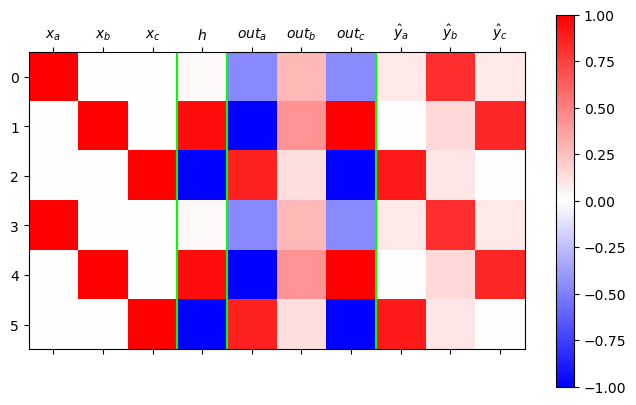

In [56]:
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x))
netout = logits = linr(h)
yhat = torch.nn.functional.softmax(netout,dim=1)
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1).data
plt.matshow(mat[:6], vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()
plt.axvline(2.5,color="lime")
plt.axvline(3.5,color="lime")
plt.axvline(6.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=[r"$x_a$",r"$x_b$",r"$x_c$",r"$h$",r"$out_a$",r"$out_b$",r"$out_c$",r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$"]);
plt.tight_layout()

```
col6의 경우 애매함 (맞춰도 객관식 소거법 같은 방식)

이유? h (col4)가 0인 경우가 있음
col 5~7 : h(col4) * weight + bias
그러나 h 가 0이면 weight가 의미가 없음 (network 표현력의 핵심은 weight)

h가 1, -1, 0으로 나올 수 밖에 없는 이유?
a,b,c 3개를 표현해야하는데 -1(a) ,1(c) 은 이미 있으므로 하나(b)는 0을 할 수 밖에 없음 (-1 및 1과 구분하려면)
다른 조합도 마찬가지

해결책?
h를 하나 더 만들면 됨 (node를 2개 사용)
```

)🗣️

In [142]:
ebdd,tanh,linr = net

/tmp/ipykernel_906200/1114894007.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


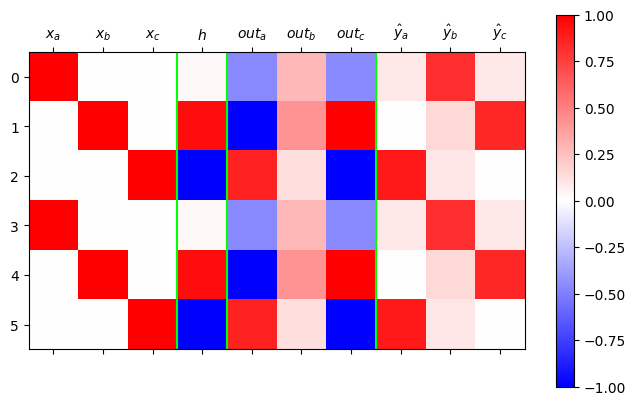

In [143]:
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x))
netout = logits = linr(h)
yhat = torch.nn.functional.softmax(netout,dim=1)
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1).data
plt.matshow(mat[:6], vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()
plt.axvline(2.5,color="lime")
plt.axvline(3.5,color="lime")
plt.axvline(6.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=[r"$x_a$",r"$x_b$",r"$x_c$",r"$h$",r"$out_a$",r"$out_b$",r"$out_c$",r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$"]);
plt.tight_layout()

`-` 시각화결과해석: 학습이 잘 된것 같지만 깔끔하지 않음.

- netout 을 보는 요령: 가장 빨간부분이 예측값이 된다. 
- 문제1: $out_b$의 경우 애매한 색깔만 있음. 네트워크가 정답을 잘 모른다는 의미.
- 문제1의 원인: $out_b$의 경우에 대응하는 ${\boldsymbol h}$를 살펴보니 흰색임. 이것은 값이 0이라는 의미인데 이때는 ${\boldsymbol h}$ 에 걸리는 선형변환 $linr$ 의 weight 가 의미없고 bias만 의미있기 때문에 특징을 잡기에 불리하다. 
- 문제2: ${\boldsymbol h}$가 흰색이면(=0이 나오면) 불리하며, 확실한 색을 가지고 있는것이 유리함. 그렇지만 확실한 색인 빨강 파랑은 이미 차지된 상태라서 어쩔수 없이 흰색으로 선택된 것.
- 문제2를 해결하는 방법: $a,b,c$라는 세문자를 표현하기에 $(-1,1)$사이의 숫자는 너무 불리함.. 

## C. MLP -- 두개의 은닉노드 

🗣️(

In [57]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3, embedding_dim=2),
    torch.nn.Tanh(), 
    torch.nn.Linear(2,3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

In [58]:
ebdd, tanh, linr = net

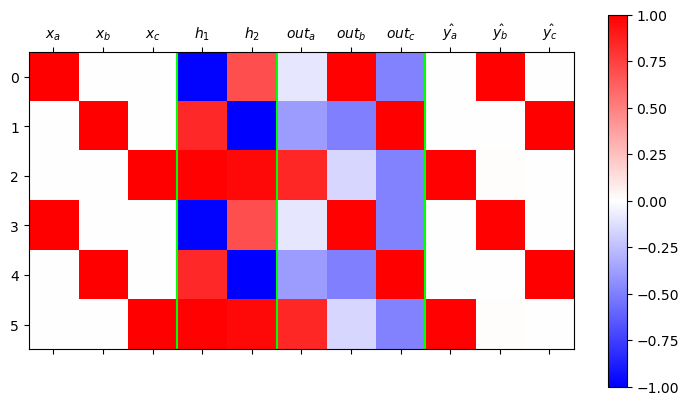

In [59]:
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x))
netout = logits = linr(h)
yhat = torch.nn.functional.softmax(netout,dim=1)
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1).data
plt.matshow(mat[:6], vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()
plt.axvline(2.5,color="lime")
plt.axvline(4.5,color="lime")
plt.axvline(7.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10],labels=[r"$x_a$", r"$x_b$", r"$x_c$",r"$h_1$",r"$h_2$",r"$out_a$",r"$out_b$",r"$out_c$",r"$\hat{y_a}$",r"$\hat{y_b}$",r"$\hat{y_c}$"]);

- 해석
    - 깔끔하고 명확한 결과 
    - X가 a일 경우: 파랑, 빨강
    - X가 b일 경우: 빨강, 파랑
    - X가 c일 경우: 빨강, 빨강
    - 심지어 파랑, 파랑 매핑은 사용하지 않음 

)🗣️

`-` 적합

In [144]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3, embedding_dim=2),
    torch.nn.Tanh(), 
    torch.nn.Linear(2,3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

In [145]:
netout.argmax(axis=1)[:5], y[:5]

(tensor([1, 2, 0, 1, 2]), tensor([1, 2, 0, 1, 2]))

`-` 결과시각화 

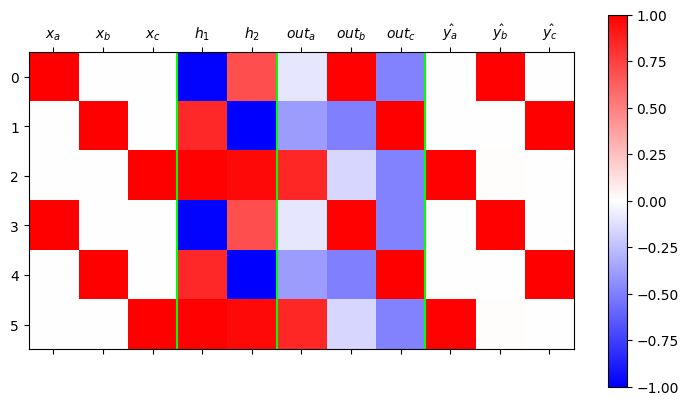

In [149]:
ebdd, tanh, linr = net 
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x))
netout = logits = linr(h)
yhat = torch.nn.functional.softmax(netout,dim=1)
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1).data
plt.matshow(mat[:6], vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()
plt.axvline(2.5,color="lime")
plt.axvline(4.5,color="lime")
plt.axvline(7.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10],labels=[r"$x_a$", r"$x_b$", r"$x_c$",r"$h_1$",r"$h_2$",r"$out_a$",r"$out_b$",r"$out_c$",r"$\hat{y_a}$",r"$\hat{y_b}$",r"$\hat{y_c}$"]);

`-` 시각화결과해석: 깔끔함. netout의 가장 빨간부분도 너무 명확함. ${\boldsymbol h}$가 0이 아닌 값으로 학습되어있음 

- x=a $\Rightarrow$ h=(파,빨) $\Rightarrow$ y=b 
- x=b $\Rightarrow$ h=(빨,파) $\Rightarrow$ y=c
- x=c $\Rightarrow$ h=(빨,빨) $\Rightarrow$ y=a 
- h = (파,파) 는 사용하지 않음. --> 문자열 d를 하나 더 쓸수 있는 공간이 $h$에 있다고 해석할 수 있음.. 

# 5. `abcd` 📝

## A. Data

In [60]:
txt = list('abcd'*100)
txt[:10]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b']

In [61]:
df_train = pd.DataFrame({'x':txt[:-1], 'y':txt[1:]})
df_train[:5]

,x,y
0,a,b
1,b,c
2,c,d
3,d,a
4,a,b


In [62]:
x = torch.tensor(df_train.x.map({'a':0, 'b':1, 'c':2, 'd':3}))
y = torch.tensor(df_train.y.map({'a':0, 'b':1, 'c':2, 'd':3}))

## B. MLP -- 하나의 은닉노드

🗣️(

- 두개의 은닉노드가 필요하겠지만 전에 흰색을 활용했던 것처럼 어떻게 해서 잘 짜맞추면 하나로도 할 수 있지 않을까?
    - ex) 빨강, 분홍, 하늘, 파랑

In [63]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4, embedding_dim=1), # 4차원
    torch.nn.Tanh(), 
    torch.nn.Linear(1,4)
)
ebdd,tanh,linr = net 

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

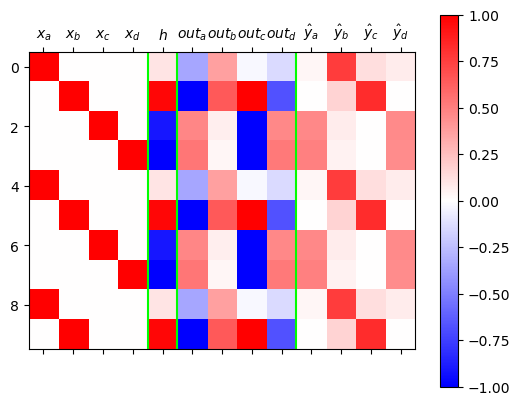

In [64]:
ebdd,tanh,linr = net
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x)).data
netout = linr(tanh(ebdd(x))).data
yhat = torch.nn.functional.softmax(net(x),dim=1).data
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1)
#---#
plt.matshow(mat[:10, :],cmap="bwr",vmin=-1,vmax=1)
plt.colorbar()
plt.axvline(3.5,color="lime")
plt.axvline(4.5,color="lime")
plt.axvline(8.5,color="lime")
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],
    labels=[
        r"$x_a$",r"$x_b$",r"$x_c$",r"$x_d$",
        r"$h$",
        r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",
        r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"]
);

- 잘 안됨(특히 X가 c,d일 때)
- 계속 해봐도 마찬가지로 잘 안됨
- 잘 되는 weight 초기값을 찾아서 사용하면 되긴 함 (많은 시행착오 끝에)

In [65]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4, embedding_dim=1),
    torch.nn.Tanh(), 
    torch.nn.Linear(1,4)
)
ebdd,tanh,linr = net 
ebdd.weight.data = torch.tensor([[-0.3333],[-2.5000],[5.0000],[0.3333]])
linr.weight.data = torch.tensor([[1.5000],[-6.0000],[-2.0000],[6.0000]])
linr.bias.data = torch.tensor([0.1500, -2.0000,  0.1500, -2.000])

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

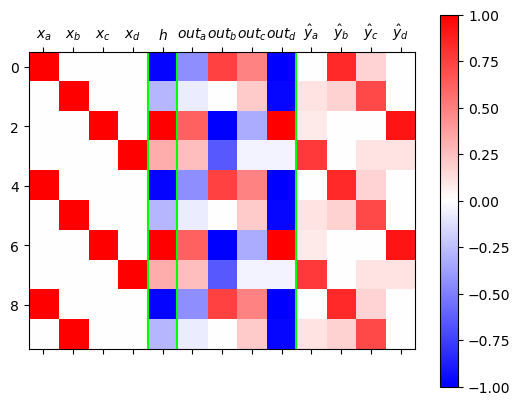

In [66]:
ebdd,tanh,linr = net
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x)).data
netout = linr(tanh(ebdd(x))).data
yhat = torch.nn.functional.softmax(net(x),dim=1).data
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1)
#---#
plt.matshow(mat[:10, :],cmap="bwr",vmin=-1,vmax=1)
plt.colorbar()
plt.axvline(3.5,color="lime")
plt.axvline(4.5,color="lime")
plt.axvline(8.5,color="lime")
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],
    labels=[
        r"$x_a$",r"$x_b$",r"$x_c$",r"$x_d$",
        r"$h$",
        r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",
        r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"]
);

- 생각했던대로 빨강, 분홍, 하늘, 파랑 으로 구분되긴 함
- 확률들이 깔끔하진 않음
- 이렇게 하는 것보다 당연히 두 개의 은닉 노드를 사용하는 것이 깔끔

)🗣️

`-` 적합

In [164]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4, embedding_dim=1),
    torch.nn.Tanh(), 
    torch.nn.Linear(1,4)
)
ebdd,tanh,linr = net 
ebdd.weight.data = torch.tensor([[-0.3333],[-2.5000],[5.0000],[0.3333]])
linr.weight.data = torch.tensor([[1.5000],[-6.0000],[-2.0000],[6.0000]])
linr.bias.data = torch.tensor([0.1500, -2.0000,  0.1500, -2.000])

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화

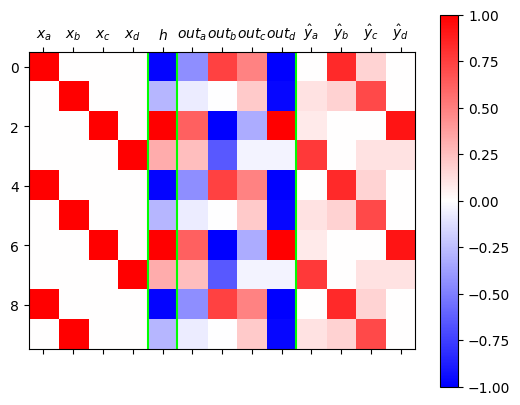

In [165]:
ebdd,tanh,linr = net
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x)).data
netout = linr(tanh(ebdd(x))).data
yhat = torch.nn.functional.softmax(net(x),dim=1).data
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1)
#---#
plt.matshow(mat[:10, :],cmap="bwr",vmin=-1,vmax=1)
plt.colorbar()
plt.axvline(3.5,color="lime")
plt.axvline(4.5,color="lime")
plt.axvline(8.5,color="lime")
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],
    labels=[
        r"$x_a$",r"$x_b$",r"$x_c$",r"$x_d$",
        r"$h$",
        r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",
        r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"]
);

## C. MLP -- 두개의 은닉노드 

🗣️(

In [69]:
#torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4, embedding_dim=2),
    torch.nn.Tanh(), 
    torch.nn.Linear(2,4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

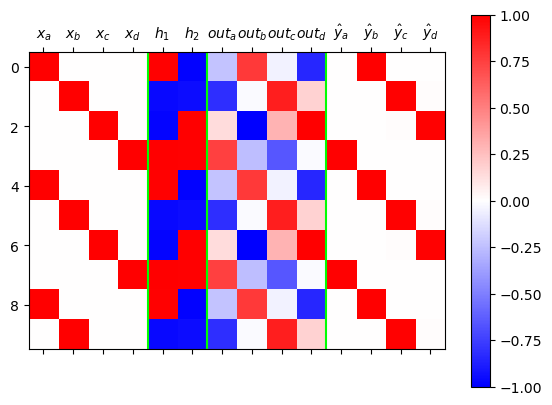

In [70]:
ebdd,tanh,linr = net
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x)).data
netout = linr(tanh(ebdd(x))).data
yhat = torch.nn.functional.softmax(net(x),dim=1).data
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1)
#---#
plt.matshow(mat[:10, :],cmap="bwr",vmin=-1,vmax=1)
plt.colorbar()
plt.axvline(3.5,color="lime")
plt.axvline(5.5,color="lime")
plt.axvline(9.5,color="lime")
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
    labels=[
        r"$x_a$",r"$x_b$",r"$x_c$",r"$x_d$",
        r"$h_1$",r"$h_2$",
        r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",
        r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"]
);

- 돌릴 때마다 결과가 달라지긴 하지만 (흰색이 나오는 경우도 있음) 대체적으로 깔끔하게 됨
- h의 dimension이 커지면 표현에 유리하기 때문

)🗣️

`-` 적합

In [170]:
#torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4, embedding_dim=2),
    torch.nn.Tanh(), 
    torch.nn.Linear(2,4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(50):
    #1 
    netout = net(x)
    #2 
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화

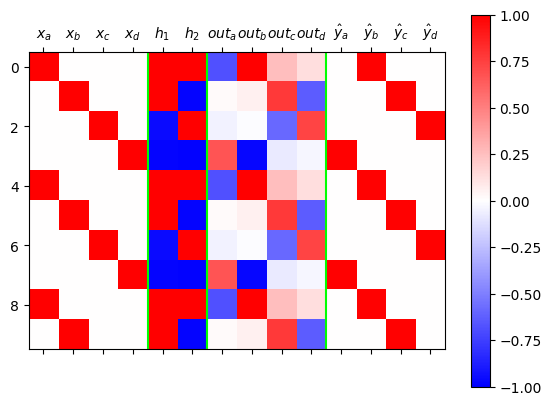

In [171]:
ebdd,tanh,linr = net
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x)).data
netout = linr(tanh(ebdd(x))).data
yhat = torch.nn.functional.softmax(net(x),dim=1).data
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1)
#---#
plt.matshow(mat[:10, :],cmap="bwr",vmin=-1,vmax=1)
plt.colorbar()
plt.axvline(3.5,color="lime")
plt.axvline(5.5,color="lime")
plt.axvline(9.5,color="lime")
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
    labels=[
        r"$x_a$",r"$x_b$",r"$x_c$",r"$x_d$",
        r"$h_1$",r"$h_2$",
        r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",
        r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"]
);

## D. 비교실험 

🗣️(

- 사용자 정의 network 이용
    - Net1: 히든 노드 1 (4 -> 1)
    - Net2: 히든 노드 2 (4 -> 2)

In [71]:
class Net1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 yhat을 구할때 사용할 레이어를 정의 
        self.ebdd = torch.nn.Embedding(4,1)
        self.tanh = torch.nn.Tanh()
        self.linr = torch.nn.Linear(1,4)
        ## 정의 끝
    def forward(self,X):
        ## yhat을 어떻게 구할것인지 정의 
        ebdd_x = self.ebdd(x)
        h = self.tanh(ebdd_x)
        netout = self.linr(h)
        ## 정의 끝
        return netout

In [72]:
class Net2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 yhat을 구할때 사용할 레이어를 정의 
        self.ebdd = torch.nn.Embedding(4,2)
        self.tanh = torch.nn.Tanh()
        self.linr = torch.nn.Linear(2,4)
        ## 정의 끝
    def forward(self,X):
        ## yhat을 어떻게 구할것인지 정의 
        ebdd_x = self.ebdd(x)
        h = self.tanh(ebdd_x)
        netout = self.linr(h)
        ## 정의 끝
        return netout

- 시각화는 h와 yhat만 함 (25개의 초기값으로)

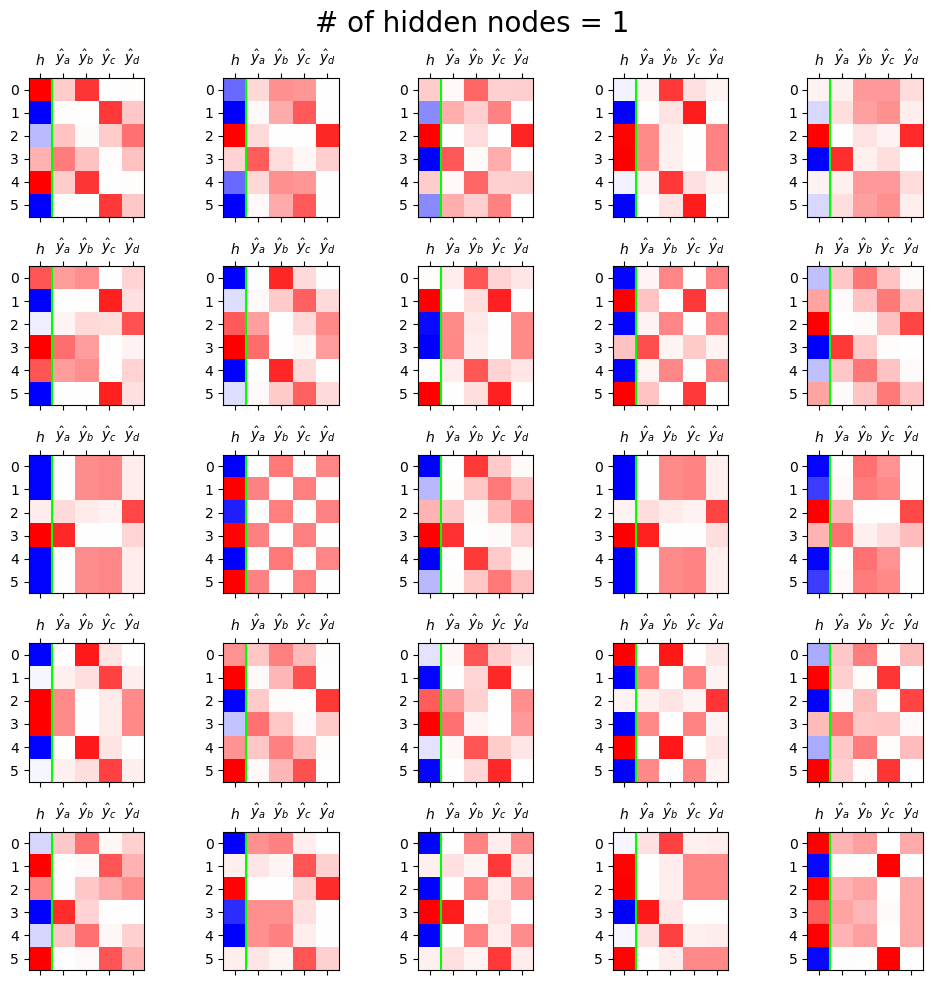

In [74]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Net1()
        optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoc in range(50):
            ## 1 
            netout = net(x)
            ## 2 
            loss = loss_fn(netout,y)
            ## 3 
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        h = net.tanh(net.ebdd(x)).data
        yhat = torch.nn.functional.softmax(net(x),dim=1).data
        mat = torch.concat([h,yhat],axis=1)
        ax[i][j].matshow(mat[:6, :],cmap='bwr',vmin=-1,vmax=1)
        ax[i][j].axvline(0.5,color='lime')
        ax[i][j].set_xticks(ticks=[0,1,2,3,4],labels=[r"$h$",r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"])
fig.suptitle("# of hidden nodes = 1", size=20)
fig.tight_layout()

- 잘 된 경우가 거의 없음
- 잘 되더라도 깔끔하진 않음

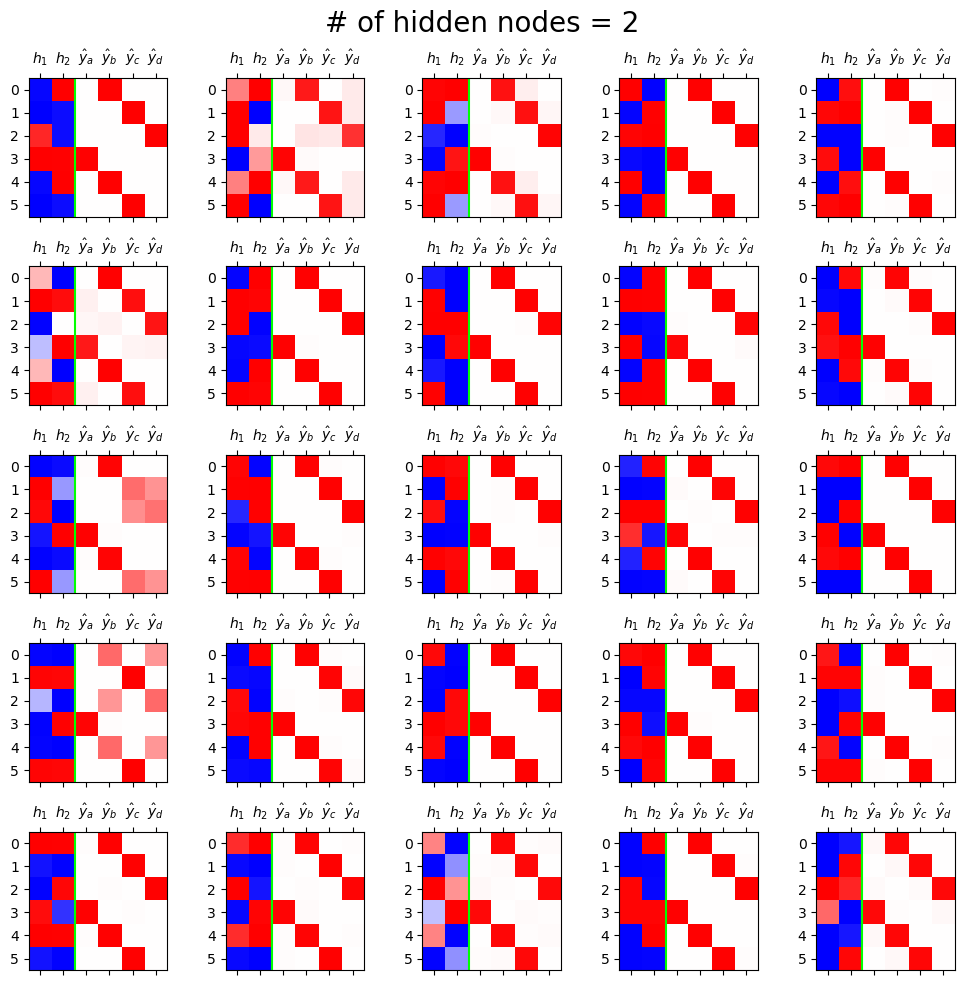

In [73]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Net2()
        optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoc in range(50):
            ## 1 
            netout = net(x)
            ## 2 
            loss = loss_fn(netout,y)
            ## 3 
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        h = net.tanh(net.ebdd(x)).data
        yhat = torch.nn.functional.softmax(net(x),dim=1).data
        mat = torch.concat([h,yhat],axis=1)
        ax[i][j].matshow(mat[:6, :],cmap='bwr',vmin=-1,vmax=1)
        ax[i][j].axvline(1.5,color='lime')
        ax[i][j].set_xticks(ticks=[0,1,2,3,4,5],labels=[r"$h_1$",r"$h_2$",r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"])
fig.suptitle("# of hidden nodes = 2", size=20)
fig.tight_layout()        

- 거의 clear하게 구분 됨
- 강의 영상에서는 모든 경우가 clear 함

)🗣️

In [172]:
class Net1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 yhat을 구할때 사용할 레이어를 정의 
        self.ebdd = torch.nn.Embedding(4,1)
        self.tanh = torch.nn.Tanh()
        self.linr = torch.nn.Linear(1,4)
        ## 정의 끝
    def forward(self,X):
        ## yhat을 어떻게 구할것인지 정의 
        ebdd_x = self.ebdd(x)
        h = self.tanh(ebdd_x)
        netout = self.linr(h)
        ## 정의 끝
        return netout

In [173]:
class Net2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 yhat을 구할때 사용할 레이어를 정의 
        self.ebdd = torch.nn.Embedding(4,2)
        self.tanh = torch.nn.Tanh()
        self.linr = torch.nn.Linear(2,4)
        ## 정의 끝
    def forward(self,X):
        ## yhat을 어떻게 구할것인지 정의 
        ebdd_x = self.ebdd(x)
        h = self.tanh(ebdd_x)
        netout = self.linr(h)
        ## 정의 끝
        return netout

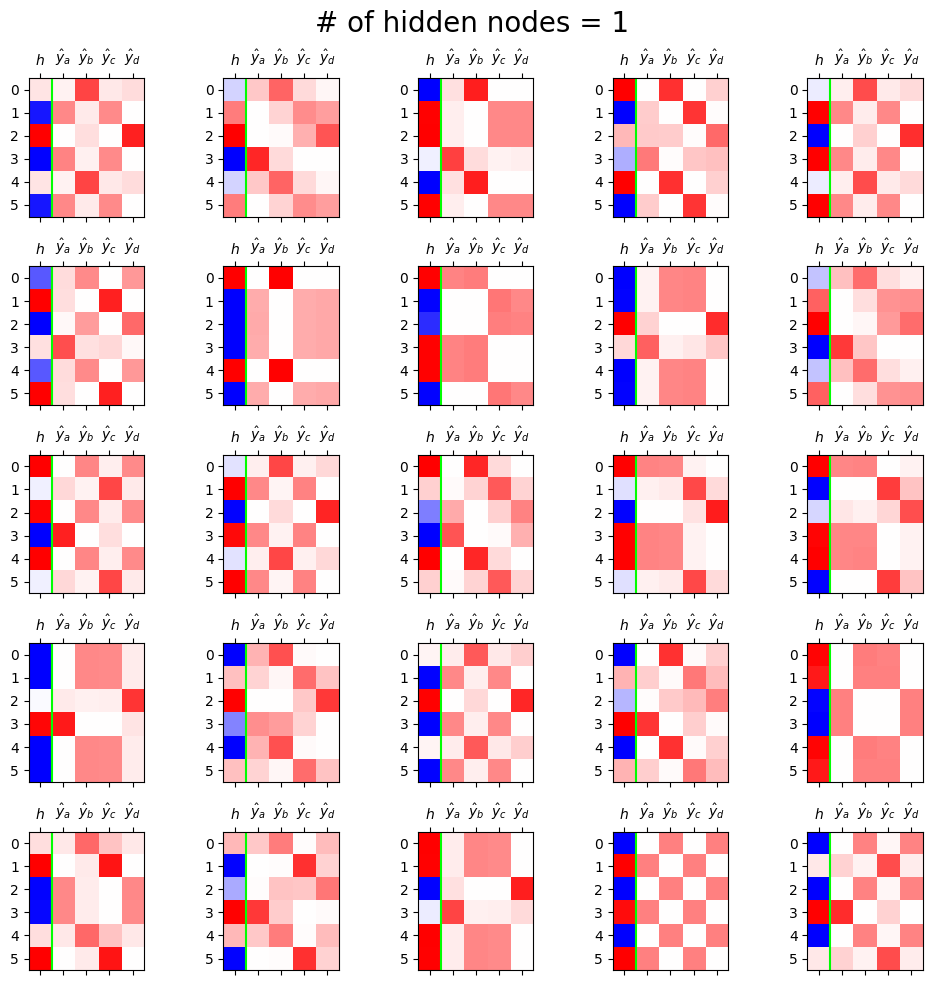

In [174]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Net1()
        optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoc in range(50):
            ## 1 
            netout = net(x)
            ## 2 
            loss = loss_fn(netout,y)
            ## 3 
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        h = net.tanh(net.ebdd(x)).data
        yhat = torch.nn.functional.softmax(net(x),dim=1).data
        mat = torch.concat([h,yhat],axis=1)
        ax[i][j].matshow(mat[:6, :],cmap='bwr',vmin=-1,vmax=1)
        ax[i][j].axvline(0.5,color='lime')
        ax[i][j].set_xticks(ticks=[0,1,2,3,4],labels=[r"$h$",r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"])
fig.suptitle("# of hidden nodes = 1", size=20)
fig.tight_layout()

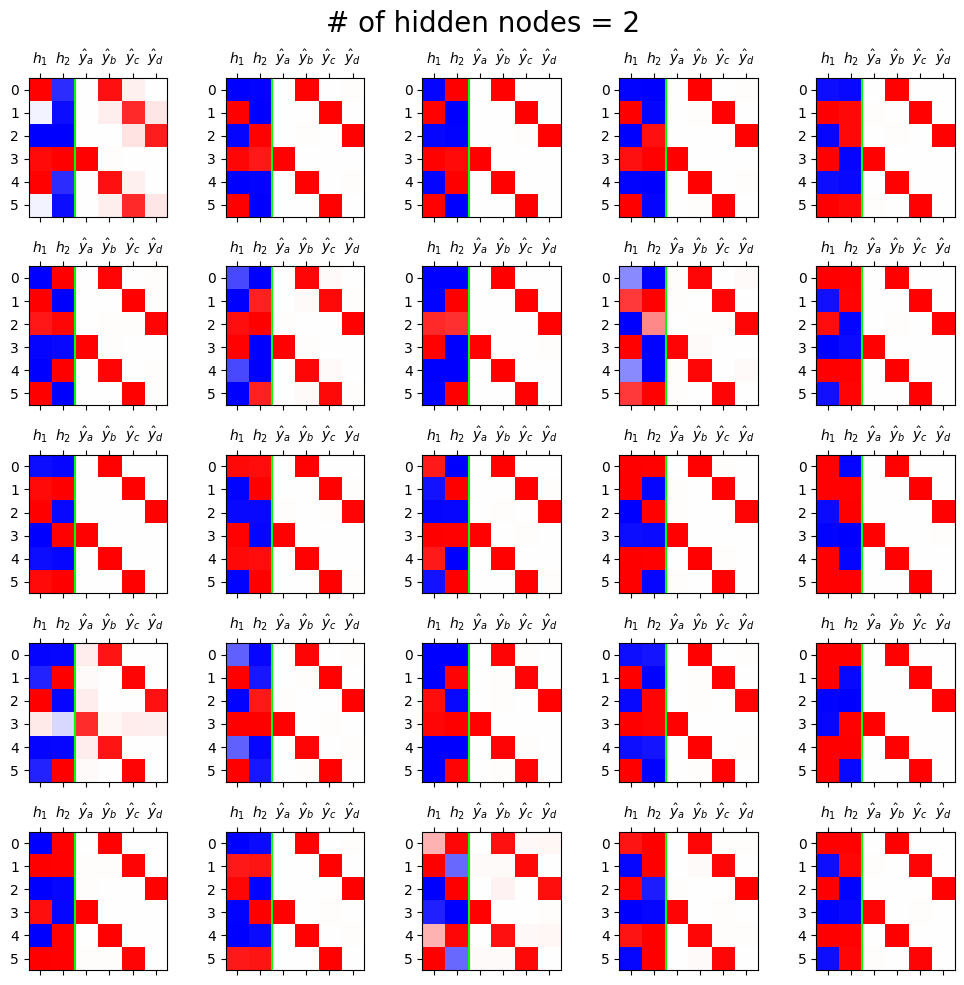

In [175]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Net2()
        optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoc in range(50):
            ## 1 
            netout = net(x)
            ## 2 
            loss = loss_fn(netout,y)
            ## 3 
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        h = net.tanh(net.ebdd(x)).data
        yhat = torch.nn.functional.softmax(net(x),dim=1).data
        mat = torch.concat([h,yhat],axis=1)
        ax[i][j].matshow(mat[:6, :],cmap='bwr',vmin=-1,vmax=1)
        ax[i][j].axvline(1.5,color='lime')
        ax[i][j].set_xticks(ticks=[0,1,2,3,4,5],labels=[r"$h_1$",r"$h_2$",r"$\hat{y}_a$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"])
fig.suptitle("# of hidden nodes = 2", size=20)
fig.tight_layout()        

# 6. ${\boldsymbol h}$ 에 대하여 ($\star\star\star$) 📝

🗣️(

```
  x     X       h
a 0  1 0 0 0  -1 1
b 1  0 1 0 0   1 1
c 2  0 0 1 0   1 -1
d 3  0 0 0 1  -1 -1
```

- h는 입력에 대한 또 다른 표현
    - one hot encoding보다 dimension이 기본적으로 작음
    - 잘 안 쓰는 이유: True 값을 모름 (hidden feature)
    - a,b,c,d가 서로 독립적이지 않으면 -1, 1 로 embedding 하기가 어려움
    - 예전에는 관련 분야 전문가가 수치를 지정하였지만
    - AI가 나온 다음에는 있다고 치고 학습을 함 

)🗣️

`-` ${\boldsymbol h}$는 사실 문자열 "abcd"들을 숫자로 바꾼 표현이라 해석할 수 있음. 즉 원핫인코딩과 다른 또 다른 형태의 숫자표현이라 해석할 수 있다. 

`-` 사실 ${\boldsymbol h}$는 원핫인코딩보다 약간 더 (1) 액기스만 남은 느낌 + (2) 숙성된 느낌을 준다

- (why1) ${\boldsymbol h}$는 ${\boldsymbol x}$ 보다 ${\boldsymbol y}$를 예측함에 좀 더 직접적인 역할을 한다. 즉 ${\boldsymbol x}$ 숫자보다 ${\boldsymbol h}$ 숫자가 잘 정리되어 있고 (차원이 낮고) 입력의 특징을 잘 정리한 (추천시스템의 MBTI처럼) 의미있는 숫자이다. 
- (why2) ${\boldsymbol x}$는 학습없이 그냥 얻어지는 숫자표현이지만, ${\boldsymbol h}$는 학습을 통하여 고치고 고치고 고친 숫자표현이다. 

# 7. `AbAcAd` -- 실패 📝

🗣️(

```
A b A c A d A b

A 다음에는 b,c,d 중 하나
bcd 다음에는 A

A와 bcd는 유사성 때문에 구분이 잘 되지 않음 (공간이 있어도)
```

)🗣️

## A. Data

In [75]:
txt = list('AbAcAd'*50)
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [76]:
df_train = pd.DataFrame({'x':txt[:-1], 'y':txt[1:]})
df_train[:5]

,x,y
0,A,b
1,b,A
2,A,c
3,c,A
4,A,d


In [77]:
x = torch.tensor(df_train.x.map({'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(df_train.y.map({'A':0,'b':1,'c':2,'d':3}))

In [78]:
x[:8],y[:8]

(tensor([0, 1, 0, 2, 0, 3, 0, 1]), tensor([1, 0, 2, 0, 3, 0, 1, 0]))

## B. MLP -- 두개의 은닉노드 (실패)

🗣️(

In [79]:
net = torch.nn.Sequential(
    torch.nn.Embedding(4,2),
    torch.nn.Tanh(),
    torch.nn.Linear(2,4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(100):
    #1
    netout = net(x)
    #2
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

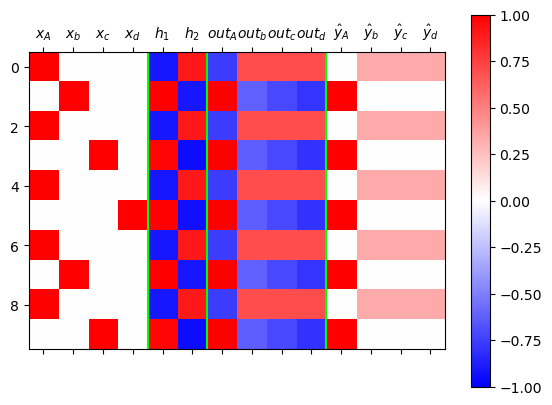

In [80]:
ebdd,tanh,linr = net
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x)).data
netout = linr(tanh(ebdd(x))).data
yhat = torch.nn.functional.softmax(net(x),dim=1).data
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1)
#---#
plt.matshow(mat[:10, :],cmap="bwr",vmin=-1,vmax=1)
plt.colorbar()
plt.axvline(3.5,color="lime")
plt.axvline(5.5,color="lime")
plt.axvline(9.5,color="lime")
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
    labels=[
        r"$x_A$",r"$x_b$",r"$x_c$",r"$x_d$",
        r"$h_1$",r"$h_2$",
        r"$out_A$",r"$out_b$",r"$out_c$",r"$out_d$",
        r"$\hat{y}_A$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"]
);

- row0에서 yhat b,c,d의 확률은 전부 1/3 (yhat A,b,c,d를 다 더하면 1이므로)
    - A 다음에 b,c,d 중 뭐가 나올지 모르겠다는 의미
- b,c,d 다음 A가 나오는 것은 잘 맞춤
- 즉 embedding 공간은 널널하지만 b,c,d를 같은 문자로 보고 있음 (A / bcd)

In [81]:
df_train

,x,y
0,A,b
1,b,A
2,A,c
3,c,A
4,A,d
...,...,...
294,A,b
295,b,A
296,A,c
297,c,A


- x가 A이면 y가 b,c,d 중 하나로 나오므로

)🗣️

`-` 적합

In [187]:
net = torch.nn.Sequential(
    torch.nn.Embedding(4,2),
    torch.nn.Tanh(),
    torch.nn.Linear(2,4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
#---#
for epoc in range(100):
    #1
    netout = net(x)
    #2
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화 

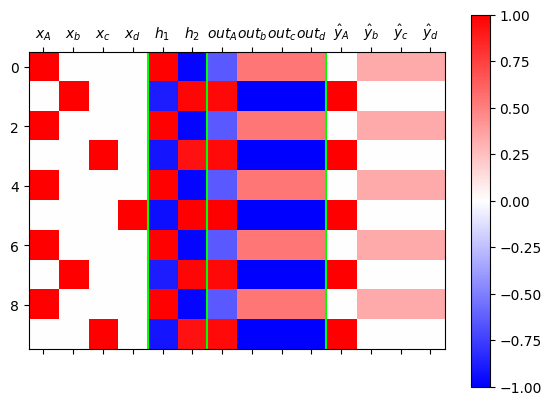

In [188]:
ebdd,tanh,linr = net
X = torch.nn.functional.one_hot(x)
h = tanh(ebdd(x)).data
netout = linr(tanh(ebdd(x))).data
yhat = torch.nn.functional.softmax(net(x),dim=1).data
mat = torch.concat([X,h,netout/netout.max(),yhat],axis=1)
#---#
plt.matshow(mat[:10, :],cmap="bwr",vmin=-1,vmax=1)
plt.colorbar()
plt.axvline(3.5,color="lime")
plt.axvline(5.5,color="lime")
plt.axvline(9.5,color="lime")
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
    labels=[
        r"$x_A$",r"$x_b$",r"$x_c$",r"$x_d$",
        r"$h_1$",r"$h_2$",
        r"$out_A$",r"$out_b$",r"$out_c$",r"$out_d$",
        r"$\hat{y}_A$",r"$\hat{y}_b$",r"$\hat{y}_c$",r"$\hat{y}_d$"]
);

- 100번 시도해봤자 100번 망함

## C. Discussions

🗣️(

```
hello

h-->e
e-->l
l-->l/o???
o-->h

해결책: 2개를 보고 예측
he-->l
el-->l
ll-->o
lo-->h

한계: 2개로 예측 안되는 문자열, 몇개로 예측된다고 정할 수 없는 문자열

=> 순환신경망
```

)🗣️

`-` 왜 망했을까? 

`-` `hello`^[2015년 Andrej Karpathy(안드레이 카파시)의 "전설적인" 블로그 <https://karpathy.github.io/2015/05/21/rnn-effectiveness/> 에 담긴 예제] 문자열을 맞출 수 있을까? 

- 이전시점을 많이 고려하면 맞출수는 있음.
- 그러나 이러한 방법들(AR, N-grams)은 한계가 뚜렷 $\to$ 순환신경망의 등장 

# 8. 겹장(덧장) 📝

🗣️(

```
3년전, 2년전, 햇간장을 가지고 -- 음식 --> 간장계란밥

4년전 간장도 넣고 싶은데 유통 기한이 3년이라면 4년전 간장을 가지고는 음식을 못함

=> 씨간장

간장 --> 500년동안 묵히지 X
올해 간장 중 일부에 작년 간장을 넣으면 나중에 작년 간장의 맛을 갖게 됨

1년차 간장
2년차 간장 + 1년차간장살짝섞음 ==> 1년차 맛이 남
3년차 간장 + (2년차 간장 + 1년차간장살짝섞음) ==> 1,2년차맛이 같이 남
...
```

)🗣️

***[수백년전통을 이어가는 방법](https://www.joongang.co.kr/article/24087690#home)***

```
“1리터에 500만원에 낙찰된 적 있습니다.”
“2kg에 1억원 정도 추산됩니다.”
“20여 종 종자장을 블렌딩해 100ml에 5000만원씩 분양 예정입니다.”

모두 씨간장(종자장) 가격에 관한 실제 일화다.

(중략...)

위스키나 와인처럼 블렌딩을 하기도 한다. 
새로 담근 간장에 씨간장을 넣거나, 씨간장독에 햇간장을 넣어 맛을 유지하기도 한다. 
이를 겹장(또는 덧장)이라 한다. 
몇몇 종갓집에선 씨간장 잇기를 몇백 년째 해오고 있다. 
매년 새로 간장을 담가야 이어갈 수 있으니 불씨 꺼트리지 않는 것처럼 굉장히 어려운 일이다.
이렇게 하는 이유는 집집마다 내려오는 고유 장맛을 잃지 않기 위함이다. 
씨간장이란 그만큼 소중한 주방의 자산이며 정체성이다.
```

덧장: 새로운간장을 만들때, 옛날간장을 섞어서 만듦